In [ ]:
# 讀取檔案
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 匯入基本套件
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 讀取csv檔
data = pd.read_csv('/content/drive/MyDrive/DM/car.csv')
data.head()

,ID,buying_price,maint_price,persons,doors,lug_boot,safety,Suggestion
0,1,59445.23818,10722.36500,2,2,36.149660,33.090481,N
1,2,66484.86768,13425.00200,2,2,40.385558,42.027988,N
2,3,63937.87879,10056.78188,2,2,35.608528,33.392949,N
3,4,70754.27367,14068.77758,2,2,54.640463,34.059059,N
4,5,52280.59800,10549.51388,2,2,26.352288,51.528390,N


## **Cluster - Hierarchical**

In [ ]:
# 選取需要資歷（排除ID與Suggestion）
array = data.values
X = array[:,1:7]
X.shape

(1728, 6)

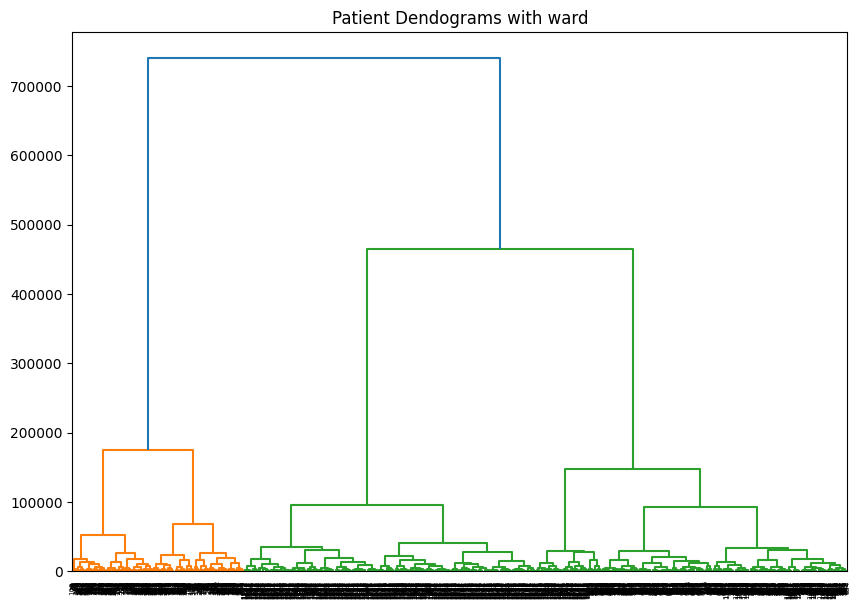

In [ ]:
# 繪製hierarchical dendrogram with ward
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10, 7))
plt.title("Patient Dendograms with ward")
dend_ward = shc.dendrogram(shc.linkage(X, method='ward'))

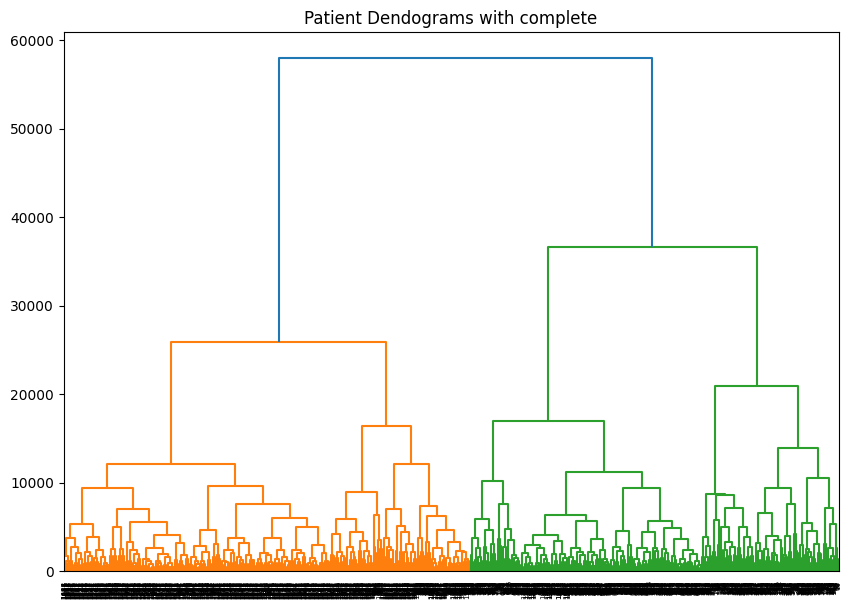

In [ ]:
# 繪製hierarchical dendrogram with with complete
plt.figure(figsize=(10, 7))
plt.title("Patient Dendograms with complete")
dend_complete = shc.dendrogram(shc.linkage(X, method='complete'))

In [ ]:
# 選取分析欄位：buying_price, maint_price, persons
patient_data = data.iloc[:, 1:4].values

In [ ]:
patient_data

array([[5.94452382e+04, 1.07223650e+04, 2.00000000e+00],
       [6.64848677e+04, 1.34250020e+04, 2.00000000e+00],
       [6.39378788e+04, 1.00567819e+04, 2.00000000e+00],
       ...,
       [2.40323805e+04, 9.38306944e+03, 6.00000000e+00],
       [2.62807539e+04, 8.25055085e+03, 6.00000000e+00],
       [3.05949830e+04, 9.65555589e+03, 6.00000000e+00]])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


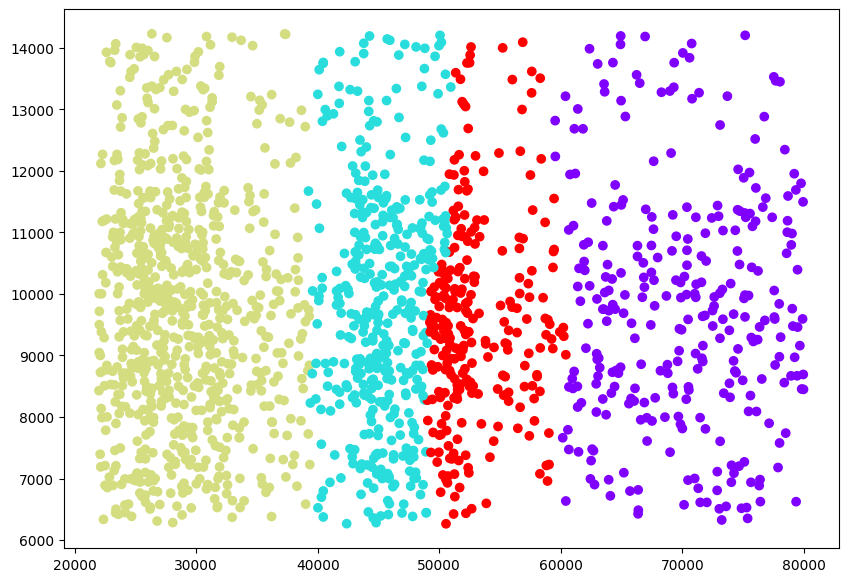

In [ ]:
# 繪製散佈圖查看分群情況
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster.fit_predict(patient_data)
plt.figure(figsize=(10, 7))
plt.scatter(patient_data[:,0], patient_data[:,1], c=cluster.labels_, cmap='rainbow')

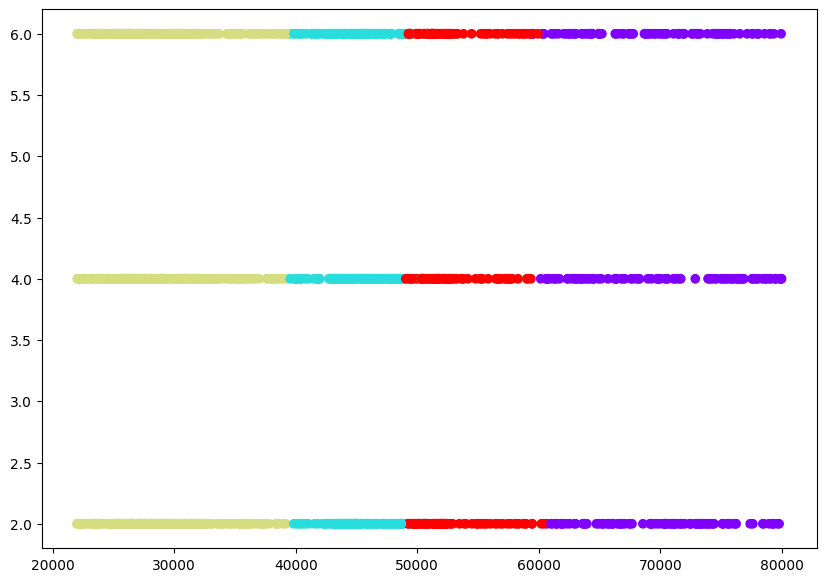

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(patient_data[:,0], patient_data[:,2], c=cluster.labels_, cmap='rainbow')

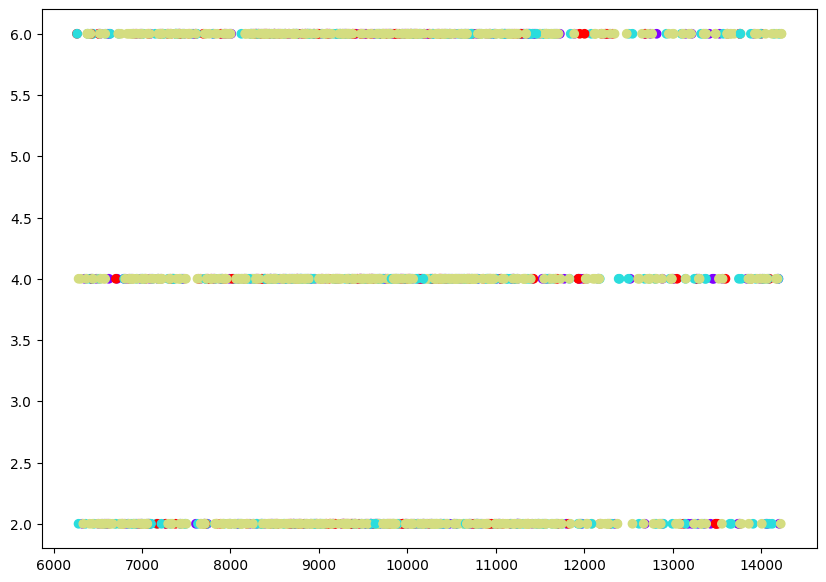

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(patient_data[:,1], patient_data[:,2], c=cluster.labels_, cmap='rainbow')

In [ ]:
patient_data_1 = data.iloc[:, 1:7].values

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


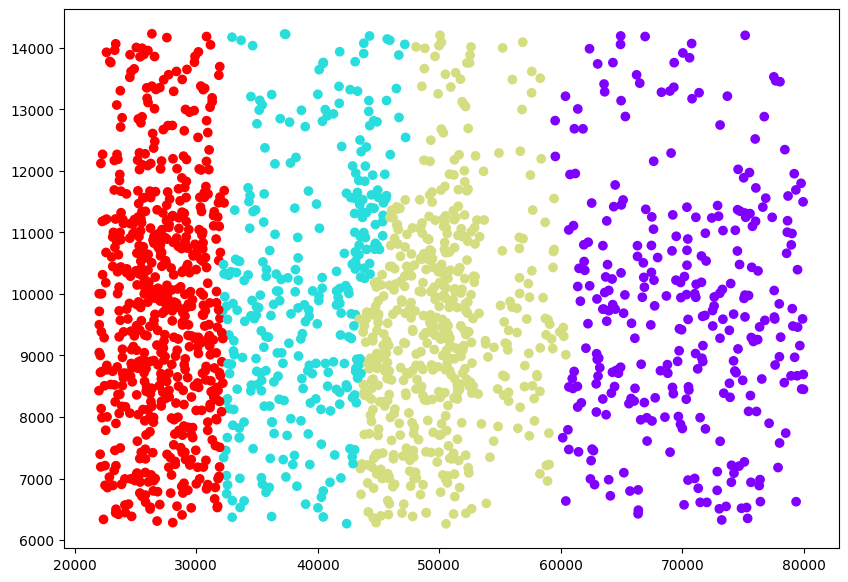

In [ ]:
cluster_1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='complete')
cluster_1.fit_predict(patient_data_1)
plt.figure(figsize=(10, 7))
plt.scatter(patient_data_1[:,0], patient_data_1[:,1], c=cluster_1.labels_, cmap='rainbow')

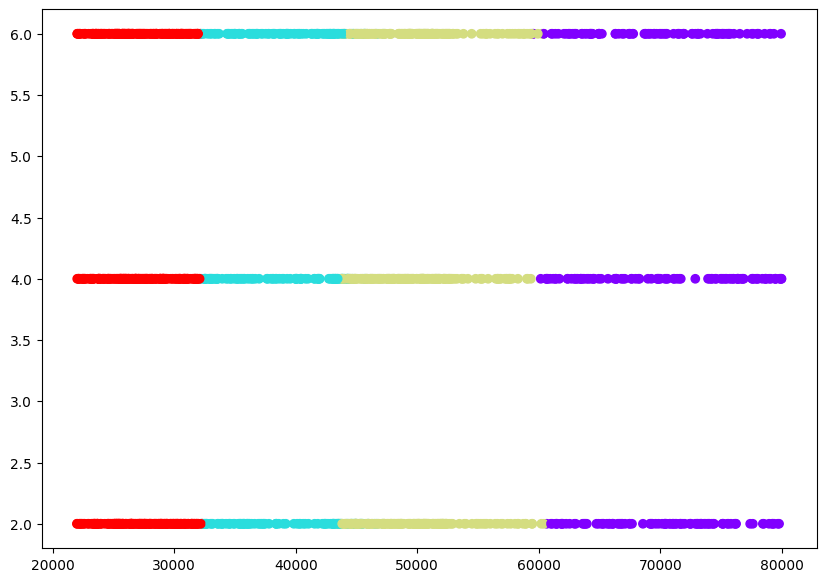

In [ ]:
plt.figure(figsize=(10, 7))
plt.scatter(patient_data_1[:,0], patient_data_1[:,2], c=cluster_1.labels_, cmap='rainbow')

### **Cluster - K-Means**

In [ ]:
import seaborn as sns; sns.set()
from sklearn.cluster import KMeans

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/DM/car.csv')
X = np.array(df1)
X = array[:,1:7]

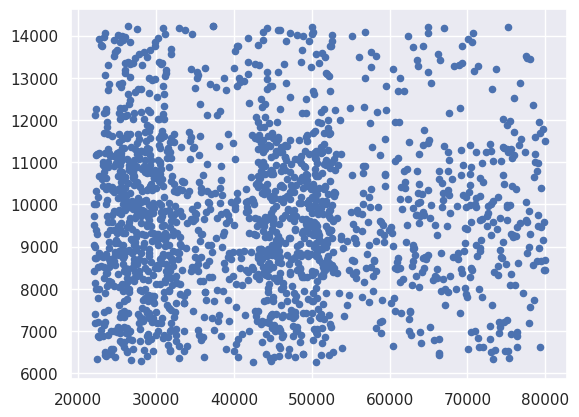

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s=20)   ## s: size
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


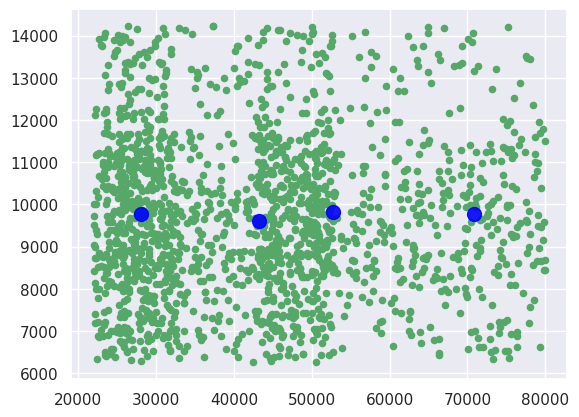

In [ ]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

plt.scatter(X[:, 0], X[:, 1], s=20, c='g')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
## s: size, alpha: color depth
plt.show()

In [ ]:
centers

array([[4.31976828e+04, 9.61578976e+03, 3.99000000e+00, 3.52250000e+00,
        4.02036043e+01, 4.36403252e+01],
       [5.27029872e+04, 9.81446075e+03, 4.06010929e+00, 3.48907104e+00,
        4.03041620e+01, 4.42008743e+01],
       [2.80940395e+04, 9.78262794e+03, 3.98240469e+00, 3.49853372e+00,
        3.93135133e+01, 4.36205287e+01],
       [7.07827631e+04, 9.77594676e+03, 3.97857143e+00, 3.48571429e+00,
        3.97245074e+01, 4.41514921e+01]])

## **Non-hierarchical: SOM**

In [ ]:
pip install somlib

  Preparing metadata (setup.py) ... done
  Created wheel for somlib: filename=somlib-0.0.4-py3-none-any.whl size=8819 sha256=faeaae123a314a5858479eff4d0b305a9e16226b4c0fcc1c2e33dee37b18058f
  Stored in directory: /root/.cache/pip/wheels/ae/33/50/f5764e42ac5c9af10cb16ffa51315a25268c1f48c70adaa368
Successfully built somlib


In [ ]:
from somlib import som
import random
from scipy.cluster.hierarchy import dendrogram, linkage

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/DM/car.csv')
temp= np.array(df)
temp = array[:,1:7]

In [ ]:
temp

array([[59445.23818, 10722.365, 2, 2, 36.14966025, 33.09048108],
       [66484.86768, 13425.002, 2, 2, 40.3855584, 42.02798823],
       [63937.87879, 10056.78188, 2, 2, 35.6085285, 33.39294919],
       ...,
       [24032.38051, 9383.069436, 6, 5, 66.18636892, 33.07861611],
       [26280.75394, 8250.550855, 6, 5, 35.60561619, 43.72297756],
       [30594.98305, 9655.555892, 6, 5, 32.43728306, 55.3791219]],
      dtype=object)

In [ ]:
samples = []

for i in range(len(df)):
    sample = temp[i]
    sample = sample.reshape(1, 6)
    samples.append(sample)

samples

[array([[59445.23818, 10722.365, 2, 2, 36.14966025, 33.09048108]],
       dtype=object),
 array([[66484.86768, 13425.002, 2, 2, 40.3855584, 42.02798823]],
       dtype=object),
 array([[63937.87879, 10056.78188, 2, 2, 35.6085285, 33.39294919]],
       dtype=object),
 array([[70754.27367, 14068.77758, 2, 2, 54.64046343, 34.05905868]],
       dtype=object),
 array([[52280.598, 10549.51388, 2, 2, 26.35228809, 51.52838998]],
       dtype=object),
 array([[52274.82427, 13752.92087, 2, 2, 41.60068497, 67.01831188]],
       dtype=object),
 array([[79751.90419, 11797.24195, 2, 2, 53.14087045, 28.95549989]],
       dtype=object),
 array([[64904.57002, 14054.52768, 2, 2, 52.91638351, 37.58359281]],
       dtype=object),
 array([[57679.77176, 11362.38182, 2, 2, 69.20140748, 45.0176697]],
       dtype=object),
 array([[76726.77351, 12880.84126, 4, 2, 30.34542101, 32.60663879]],
       dtype=object),
 array([[64919.39973, 14192.00695, 4, 2, 35.50019707, 51.85570828]],
       dtype=object),
 array([

In [ ]:
np.array(samples).shape

(1728, 1, 6)

In [ ]:
# 將dtype=object改為float
samples = np.array(samples).astype(dtype=float).tolist()

In [ ]:
s = som.SOM(neurons=(1, 4), dimentions=6 ,n_iter=500, learning_rate=0.2)
s.train(samples)
print("Cluster centres:", s.weights_)
print("labels:", s.labels_)
result = s.predict(samples)

Iteration : 1
Iteration : 2
Iteration : 3
Iteration : 4
Iteration : 5
Iteration : 6
Iteration : 7
Iteration : 8
Iteration : 9
Iteration : 10
Iteration : 11
Iteration : 12
Iteration : 13
Iteration : 14
Iteration : 15
Iteration : 16
Iteration : 17
Iteration : 18
Iteration : 19
Iteration : 20
Iteration : 21
Iteration : 22
Iteration : 23
Iteration : 24
Iteration : 25
Iteration : 26
Iteration : 27
Iteration : 28
Iteration : 29
Iteration : 30
Iteration : 31
Iteration : 32
Iteration : 33
Iteration : 34
Iteration : 35
Iteration : 36
Iteration : 37
Iteration : 38
Iteration : 39
Iteration : 40
Iteration : 41
Iteration : 42
Iteration : 43
Iteration : 44
Iteration : 45
Iteration : 46
Iteration : 47
Iteration : 48
Iteration : 49
Iteration : 50
Iteration : 51
Iteration : 52
Iteration : 53
Iteration : 54
Iteration : 55
Iteration : 56
Iteration : 57
Iteration : 58
Iteration : 59
Iteration : 60
Iteration : 61
Iteration : 62
Iteration : 63
Iteration : 64
Iteration : 65
Iteration : 66
Iteration : 67
Iter

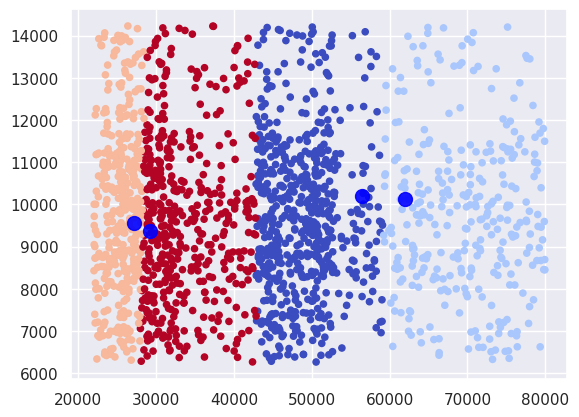

In [ ]:
plt.scatter(temp[:, 0], temp[:, 1], c= s.labels_, s=20, cmap='coolwarm')
centers = s.weights_
plt.scatter(centers[:, 0], centers[:, 1], c='blue', s=100, alpha=0.9);
plt.show()

## **Non-hierarchical: Discriminant**

In [ ]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler

In [ ]:
df1

,ID,buying_price,maint_price,persons,doors,lug_boot,safety,Suggestion
0,1,59445.23818,10722.365000,2,2,36.149660,33.090481,N
1,2,66484.86768,13425.002000,2,2,40.385558,42.027988,N
2,3,63937.87879,10056.781880,2,2,35.608528,33.392949,N
3,4,70754.27367,14068.777580,2,2,54.640463,34.059059,N
4,5,52280.59800,10549.513880,2,2,26.352288,51.528390,N
...,...,...,...,...,...,...,...,...
1723,1724,30017.03196,6914.240966,6,5,49.926725,44.001295,Y
1724,1725,25814.91981,6731.363672,6,5,29.127094,55.426870,Y
1725,1726,24032.38051,9383.069436,6,5,66.186369,33.078616,N
1726,1727,26280.75394,8250.550855,6,5,35.605616,43.722978,Y


In [ ]:
features = ['buying_price', 'maint_price', 'persons', 'doors', 'lug_boot', 'safety']

# Separating out the features
x = df1.loc[:, features].values

# Separating out the target
y = df1.loc[:,['Suggestion']].values

In [ ]:
X = np.array(StandardScaler().fit_transform(x))
y= np.array(y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
temp=y_train.flatten()
print(Counter(temp))

Counter({'N': 848, 'Y': 361})


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_SM, y_train_SM = sm.fit_resample(X_train, y_train)
print(Counter(y_train_SM))

Counter({'N': 848, 'Y': 848})


In [ ]:
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_SM, y_train_SM)

LinearDiscriminantAnalysis()

In [ ]:
y_predicted = clf.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[278,  84],
       [ 41, 116]])